# matplotlib - 2D plotting in OOP

Modified from [Scientific Python Lectures](http://github.com/jrjohansson/scientific-python-lectures) by J.R. Johansson (jrjohansson at gmail.com).

In [3]:
# Demonstrates the following:
#     plotting logarithmic axes
#     user-defined functions
#     "where" function, NumPy array conditional

# Define the sinc function, with output for x=0 defined
# as a special case to avoid division by zero. The code
# below defining the sinc function is developed and
# explained in Chapter 7, Section 1.
def s(x):
  a = np.where(x==0., 1., np.sin(x)/x)
  return a

import numpy as np
import matplotlib.pyplot as plt
# create arrays for plotting
x = np.arange(0., 10., 0.1)
y = np.exp(x)

t = np.linspace(-10., 10., 100)
z = s(t)

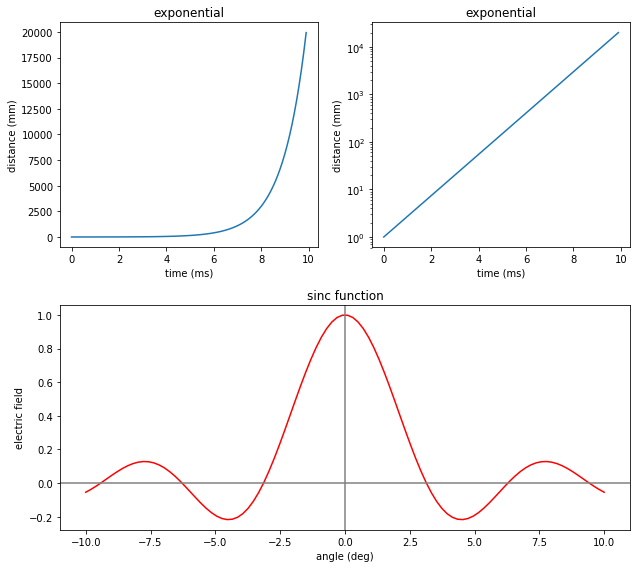

In [4]:
# create a figure window
fig = plt.figure(1, figsize=(9,8))

# subplot: linear plot of exponential
ax1 = fig.add_subplot(2,2,1)
ax1.plot(x, y)
ax1.set_xlabel('time (ms)')
ax1.set_ylabel('distance (mm)')
ax1.set_title('exponential')

# subplot: semi-log plot of exponential
ax2 = fig.add_subplot(2,2,2)
ax2.plot(x, y)
ax2.set_yscale('log')
ax2.set_xlabel('time (ms)')
ax2.set_ylabel('distance (mm)')
ax2.set_title('exponential')

# subplot: wide subplot of sinc function
ax3 = fig.add_subplot(2,1,2)
ax3.plot(t, z, 'r')
ax3.axhline(color='gray')
ax3.axvline(color='gray')
ax3.set_xlabel('angle (deg)')
ax3.set_ylabel('electric field')
ax3.set_title('sinc function')

# Adjusts white space to avoid collisions between subplots
fig.tight_layout()

The MatPlotLib statement above creates a **Figure** object, assigns it the name `fig`, and opens a blank figure window. Thus, just as we give lists, arrays, and numbers variable names, we can give a figure object and the window in creates a name: here it is `fig`. In fact we can use the `figure` function to open up multiple figure objects with different figure windows. 

The `fig.add_subplot(2,2,1)` is a MatPlotLib function that divides the figure window into 2 rows (the first argument) and 2 columns (the second argument). The third argument creates a subplot in the first of the 4 subregions (*i.e.* of the 2 rows $\times$ 2 columns) created by the `fig.add_subplot(2,2,1)` call. To see how this works, type the following code into a Python module and run it:

Writing `ax1 = fig.add_subplot(2,2,1)` assigns the name ax1 to the axes in the upper left quadrant of the figure window.

The `ax1.plot(x, y)` directs Python to plot the previously-defined `x` and `y` arrays onto the axes named `ax1`. 

The `ax2 = fig.add_subplot(2,2,2)` draws axes in the second, or upper right, quadrant of the figure window. 

The `ax3 = fig.add_subplot(2,1,2)` divides the figure window into 2 rows (first argument) and 1 column (second argument), creates axes in the second or these two sections, and assigns those axes (*i.e.* that subplot) the name `ax3`. 

That is, it divides the figure window into 2 halves, top and bottom, and then draws axes in the half number 2 (the third argument), or lower half of the figure window.

You may have noticed in above code that some of the function calls are a bit different from those used before: `xlabel("time (ms)")` becomes `set_xlabel("time (ms)")`, `title("exponential")` becomes `set_title("exponential")`, *etc.*

The call `ax2.set_yscale('log')` sets the $y$-axes in the second plot to be logarithmic, thus creating a semi-log plot. Creating properly-labeled logarthmic axes like this is more straightforward with the advanced syntax illustrated in the above example.




Using the prefixes `ax1`, `ax2`, or `ax3`, direct graphical instructions to their respective subplots. By creating and specifying names for the different figure windows and subplots within them, you access the different plot windows more efficiently. For example, the following code makes four identical subplots in a single figure window using a `for` loop.

## The matplotlib object-oriented API (Application Program Interface)

The main idea with __object-oriented programming__ is to have objects that one can apply functions and actions on. The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #If you have high resolution display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [7]:
x = np.linspace(0,10,100)
y = x*x + 2.

Text(0.5,1,'title')

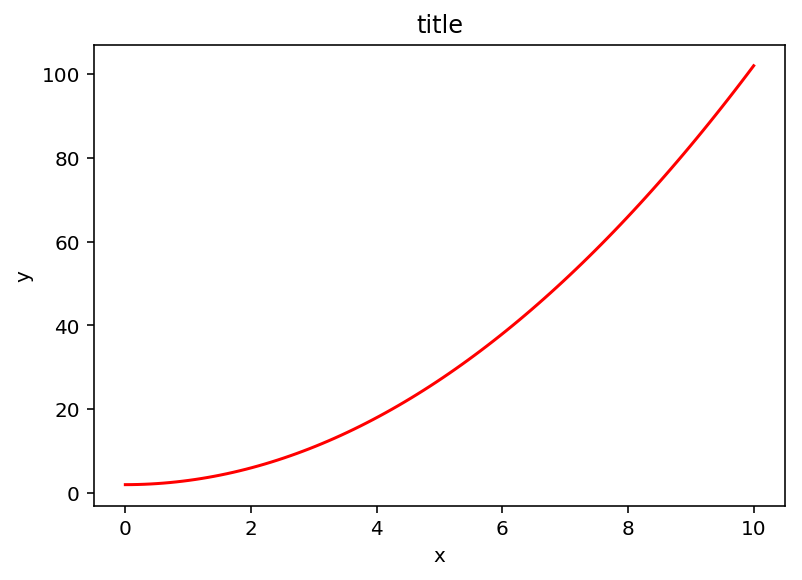

In [8]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

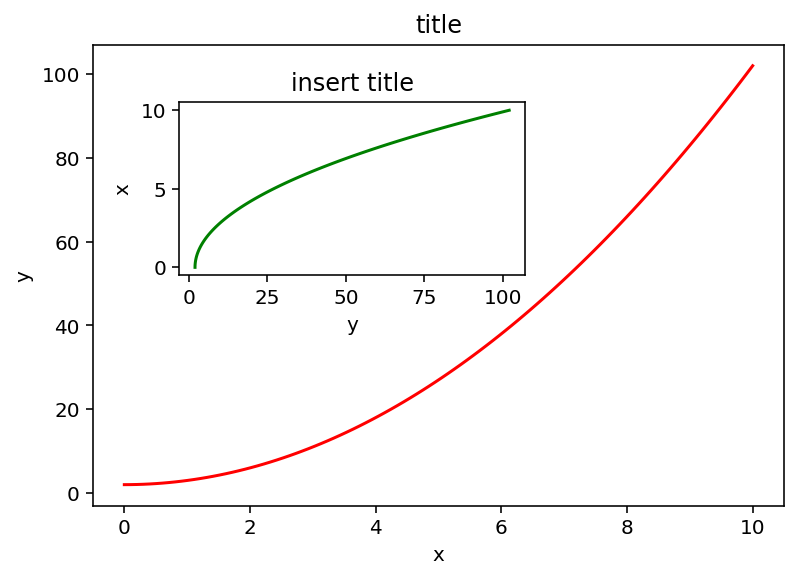

In [289]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

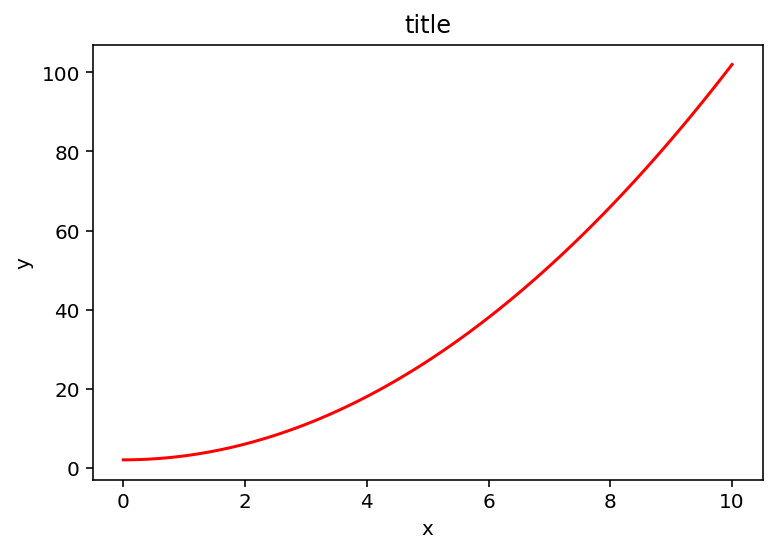

In [290]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

<class 'numpy.ndarray'> (2,)


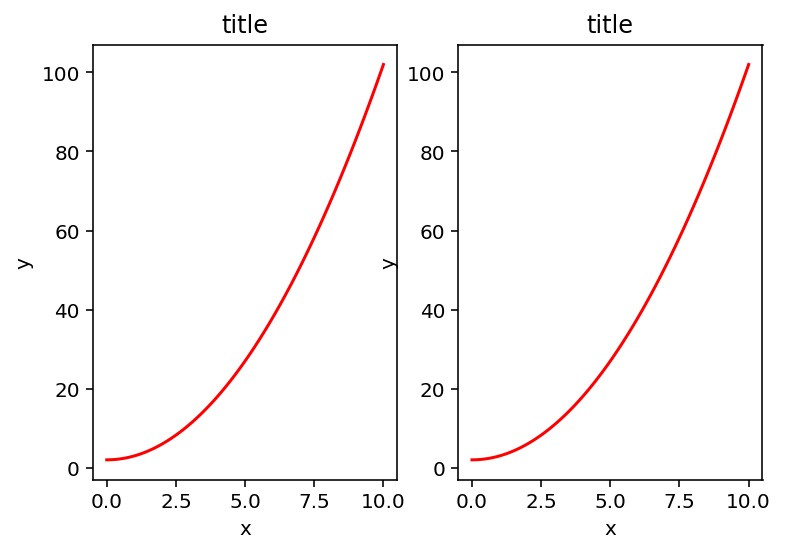

In [291]:
fig, axes = plt.subplots(nrows=1, ncols=2)
print(type(axes), axes.shape)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

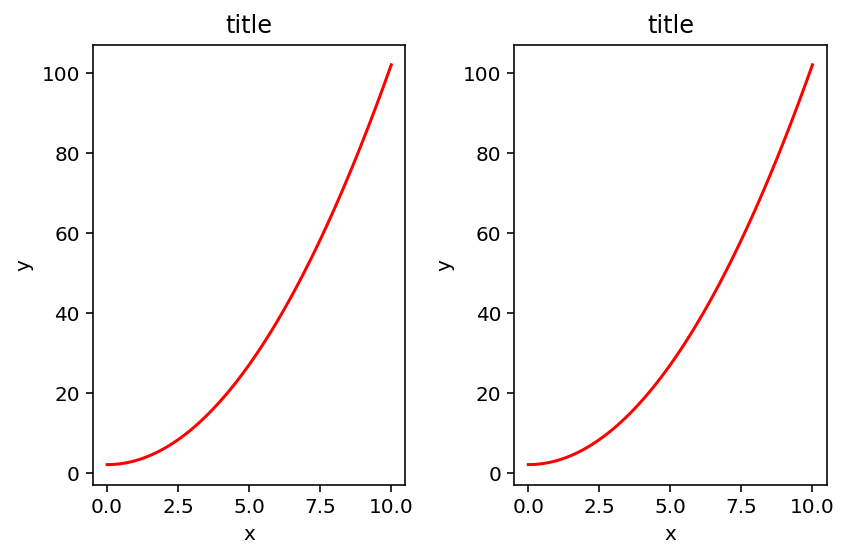

In [292]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do: 

In [293]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

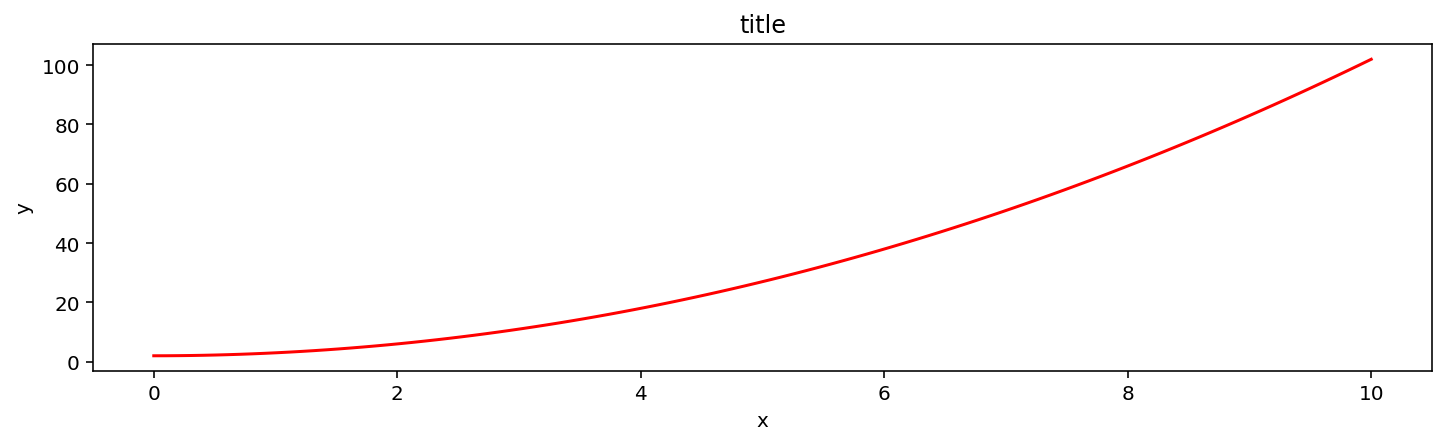

In [294]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [295]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [296]:
fig.savefig("filename.png", dpi=200)

### Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [297]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [298]:
axes.set_xlabel("x")
axes.set_ylabel("y");

**Legends**

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves:

In [299]:
axes.legend(["curve1", "curve2", "curve3"]);

The method described above follows the MATLAB API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in a wrongly labelled curve).

A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure: 

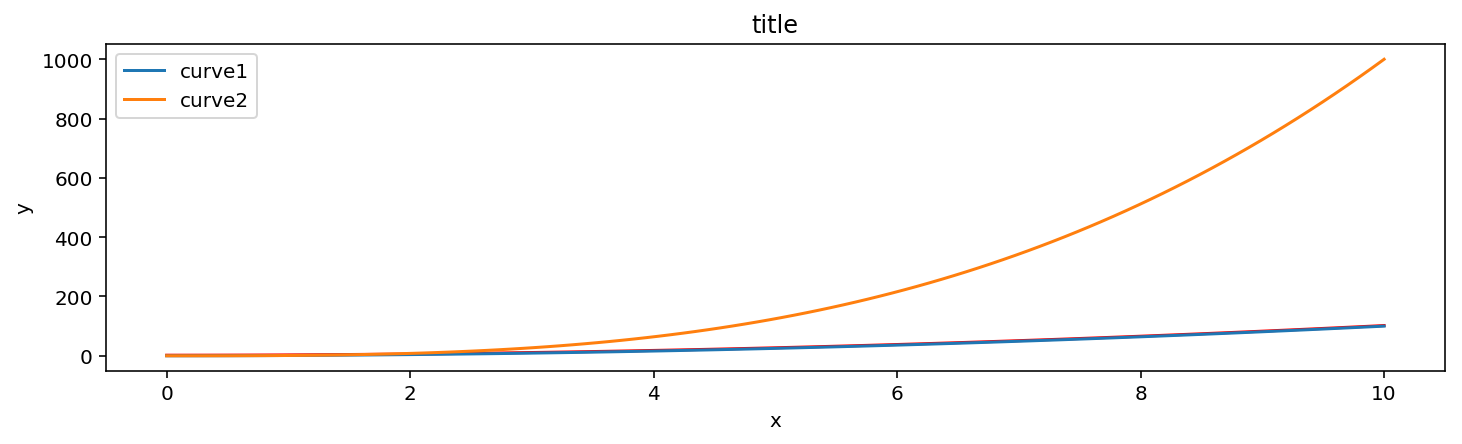

In [300]:
axes.plot(x, x**2, label="curve1")
axes.plot(x, x**3, label="curve2")
axes.legend()
fig

The following figure shows how to use the figure title, axis labels and legends described above:

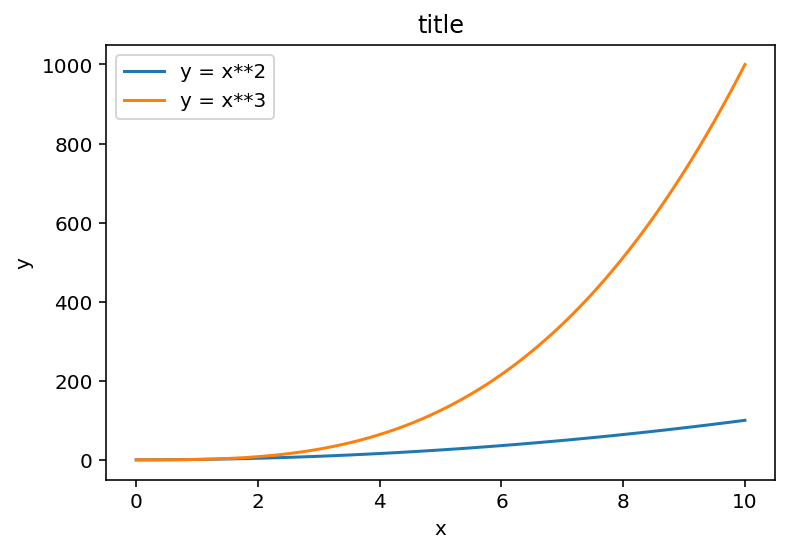

In [301]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

### Formatting text: LaTeX, fontsize, font family

In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`:

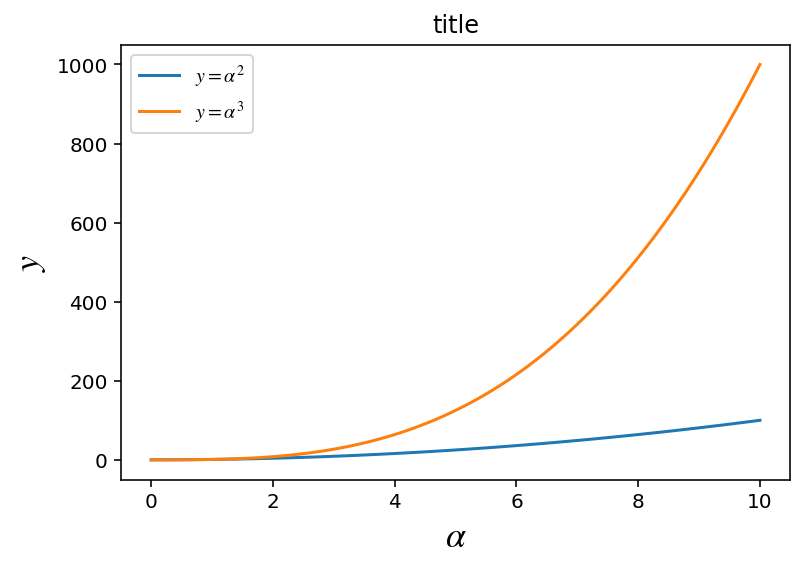

In [302]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [303]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

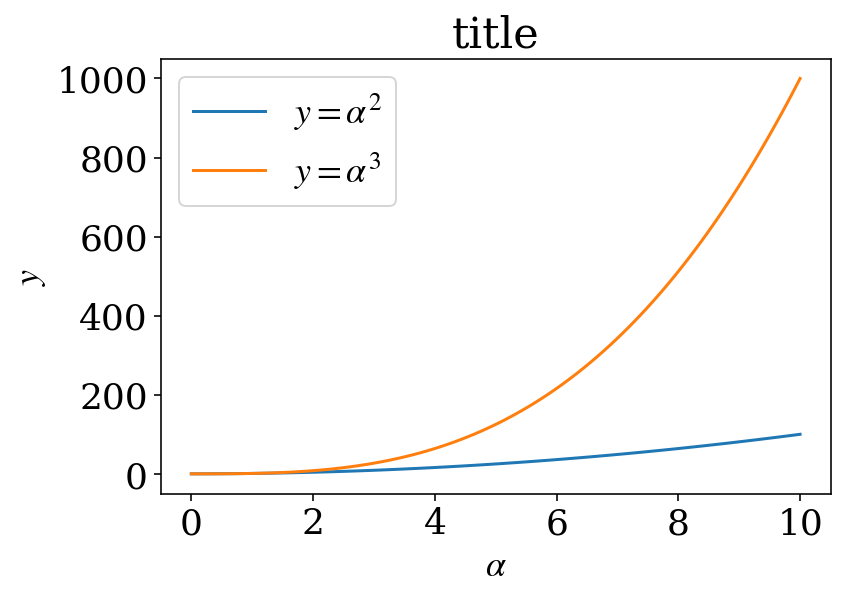

In [304]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

A good choice of global fonts are the STIX fonts: 

In [305]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

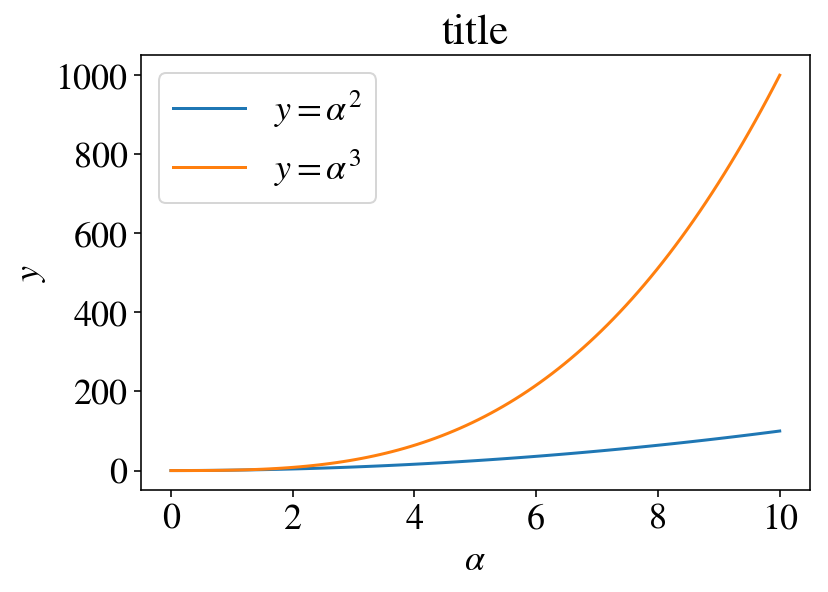

In [306]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

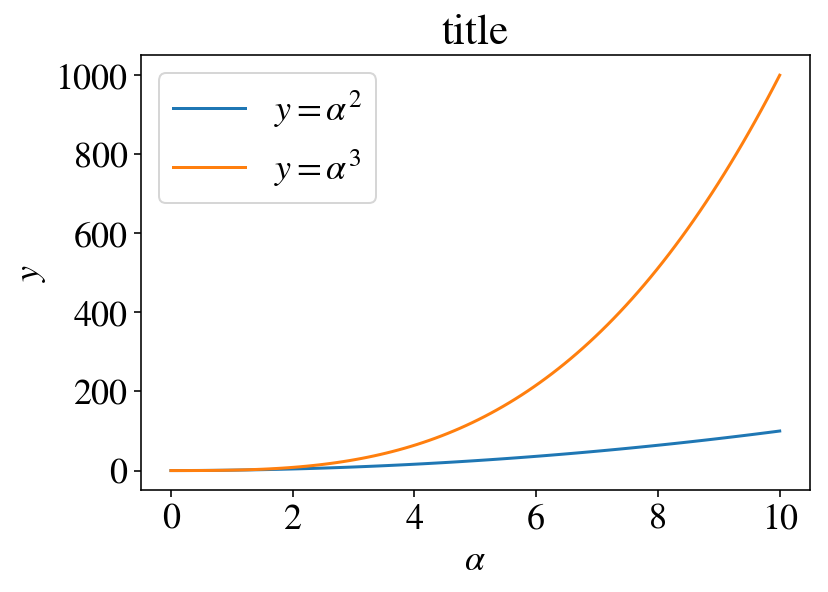

In [307]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

In [308]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

### Setting colors, linewidths, linetypes

#### Colors

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

In [309]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

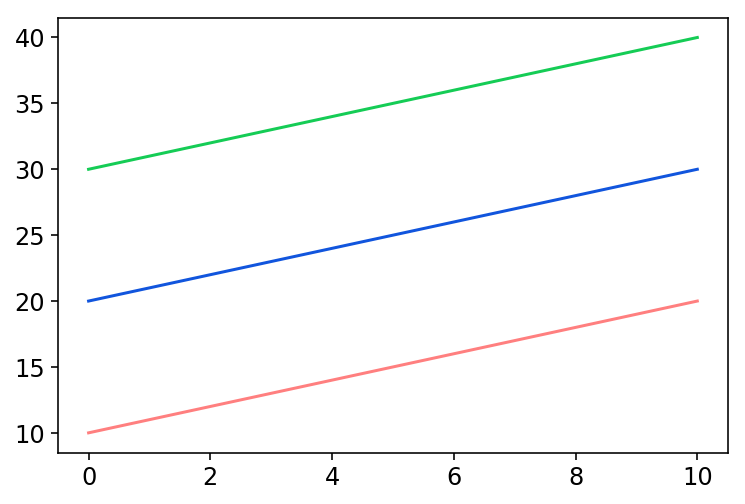

In [310]:
fig, ax = plt.subplots()

ax.plot(x, x+10, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+20, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+30, color="#15cc55")        # RGB hex code for a greenish color

#### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

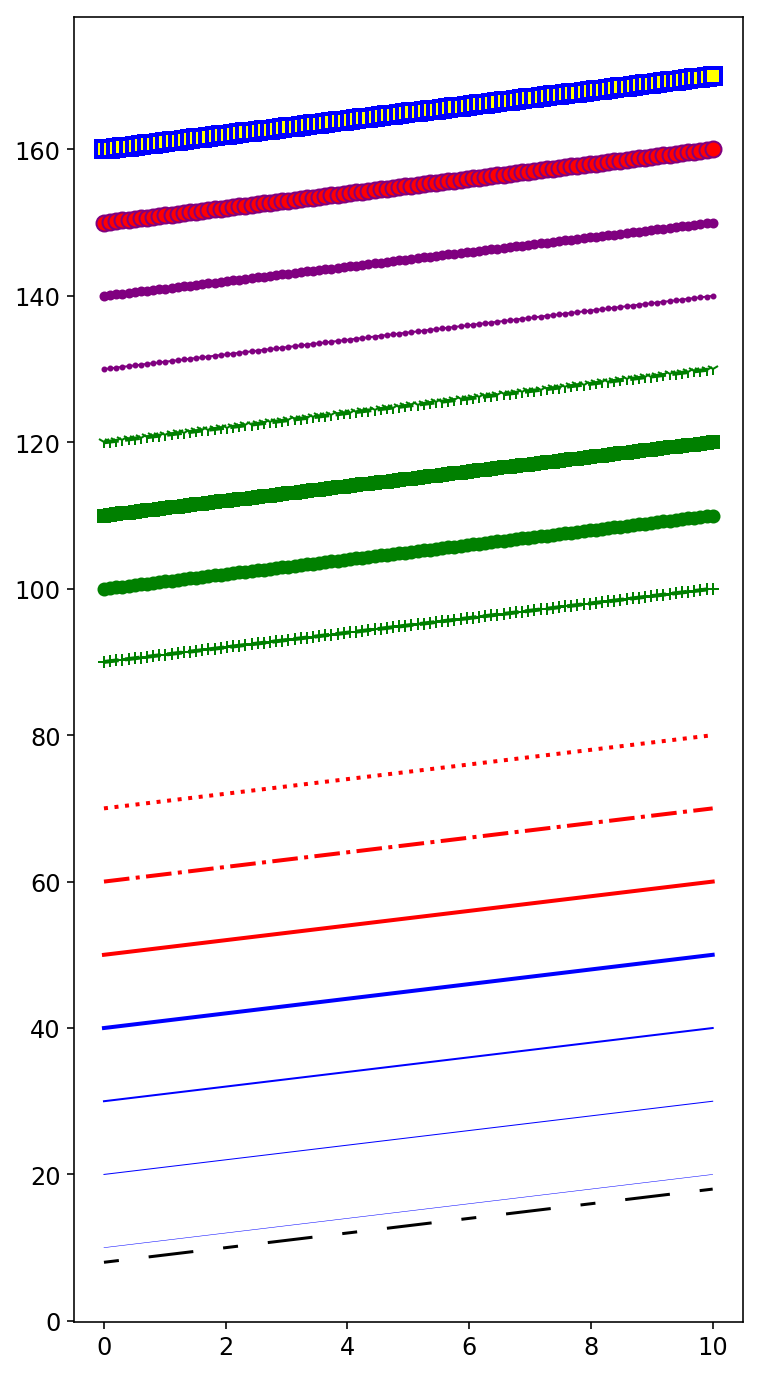

In [311]:
fig, ax = plt.subplots(figsize=(6,12))

ax.plot(x, x+10, color="blue", linewidth=0.25)
ax.plot(x, x+20, color="blue", linewidth=0.50)
ax.plot(x, x+30, color="blue", linewidth=1.00)
ax.plot(x, x+40, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+50, color="red", lw=2, linestyle='-')
ax.plot(x, x+60, color="red", lw=2, ls='-.')
ax.plot(x, x+70, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 90, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+100, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+110, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+120, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+130, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+140, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+150, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+160, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges:

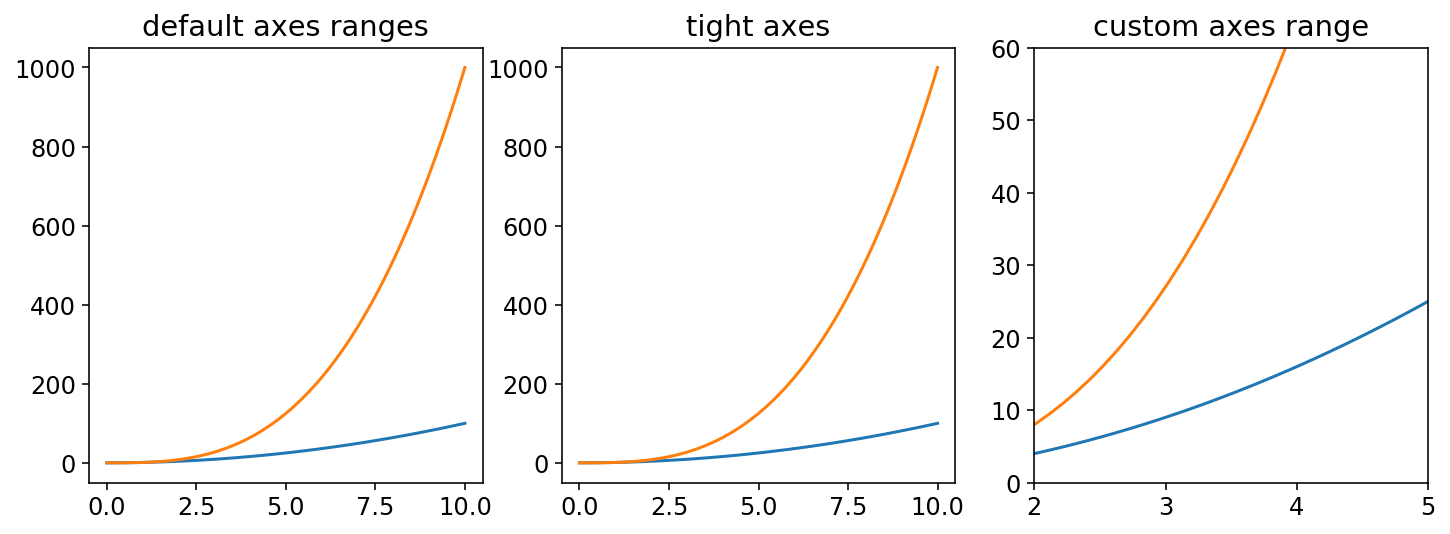

In [312]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

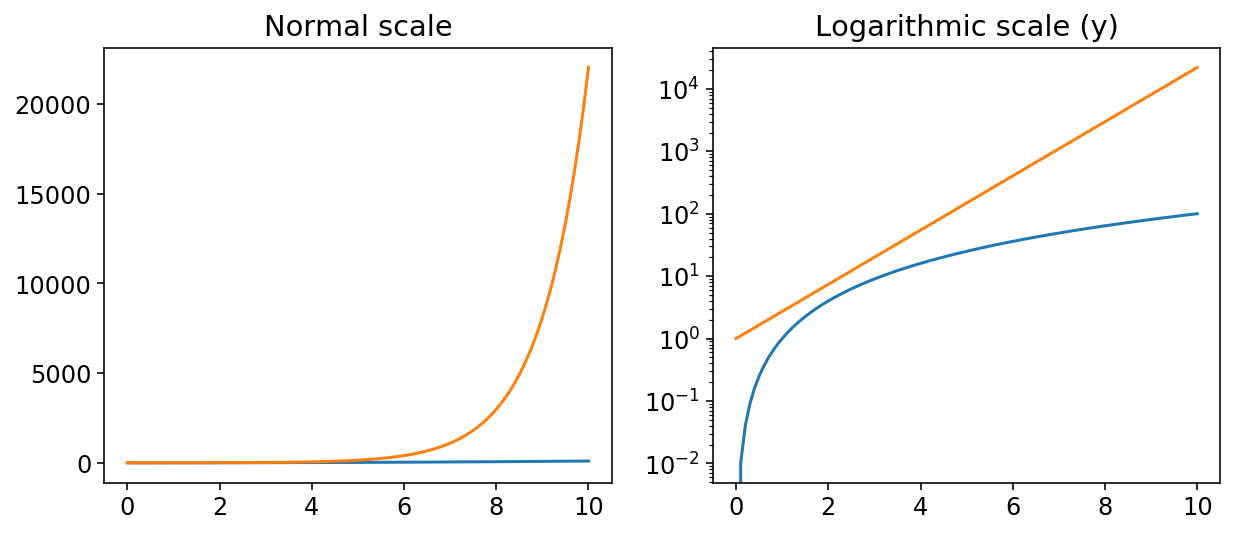

In [313]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

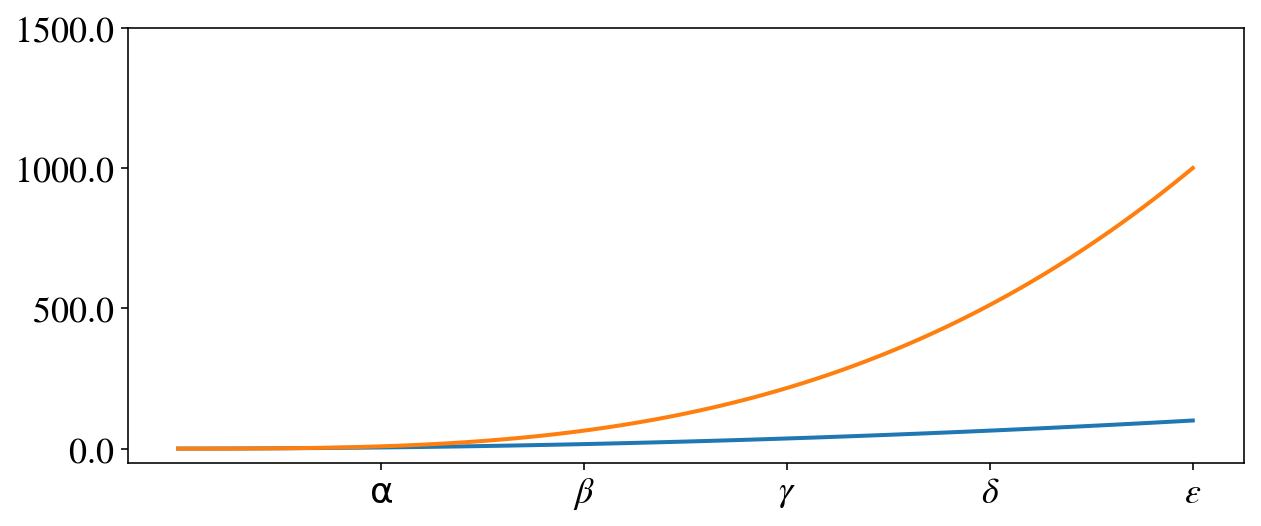

In [314]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks(np.asarray([1, 2, 3, 4, 5])*2)
ax.set_xticklabels([r'$\mathdefault{\alpha}$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 500, 1000, 1500]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

#### Scientific notation

With large numbers on axes, it is often better use scientific notation:

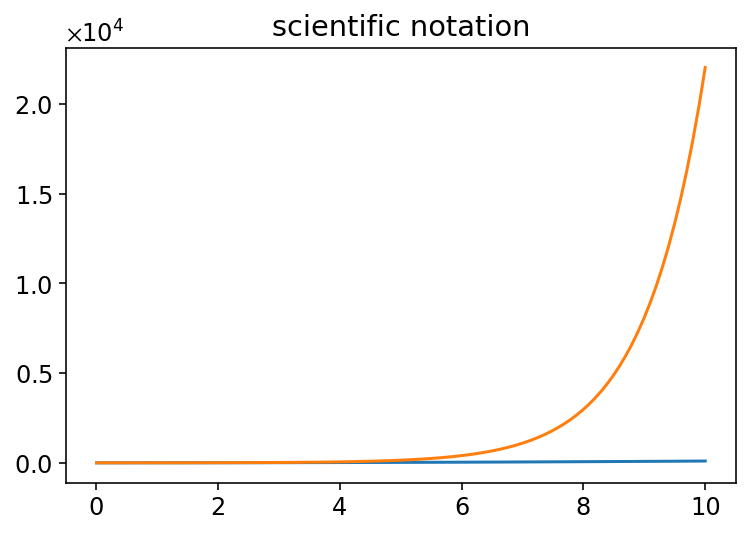

In [315]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

#ax.set_yticks([0, 500, 1000, 1500])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

#### Axis position adjustments

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

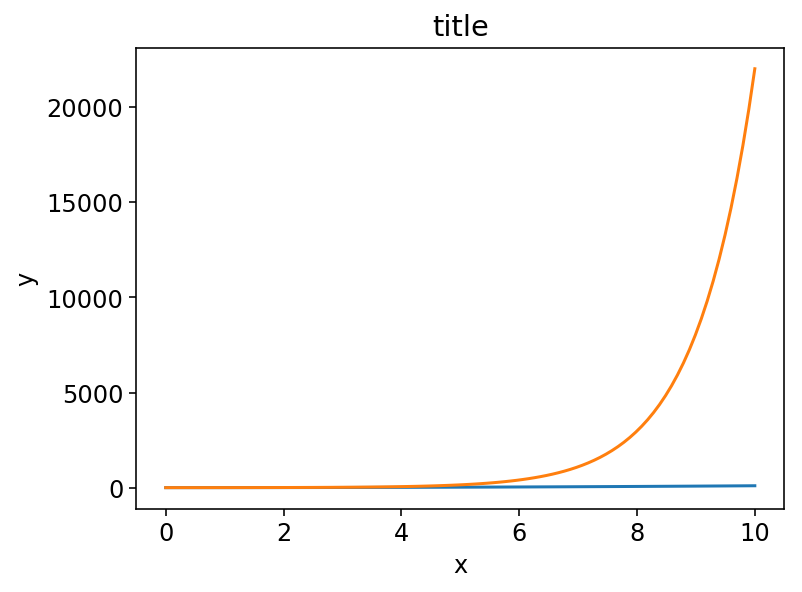

In [316]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
#ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

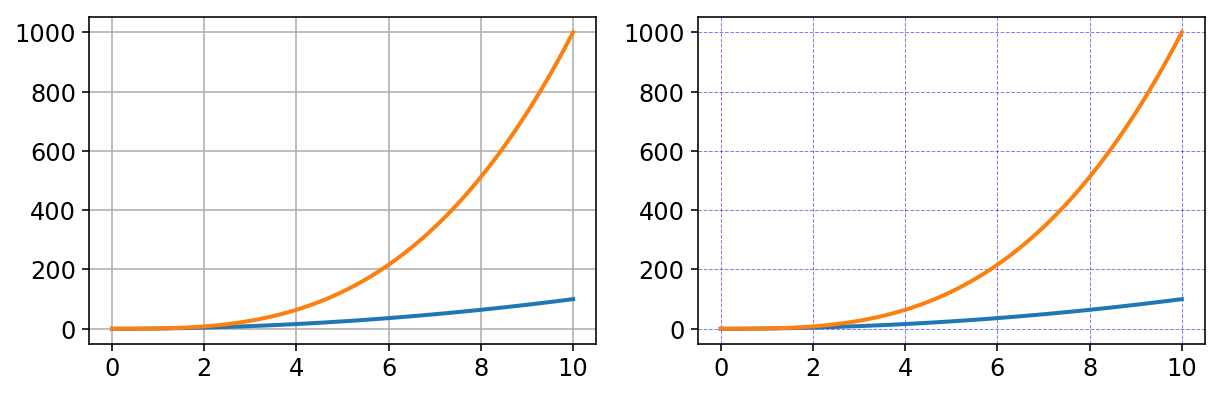

In [317]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
#axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1].grid(color='b', alpha=0.5, linestyle='--', linewidth=0.5)

### Axis spines

We can also change the properties of axis spines:

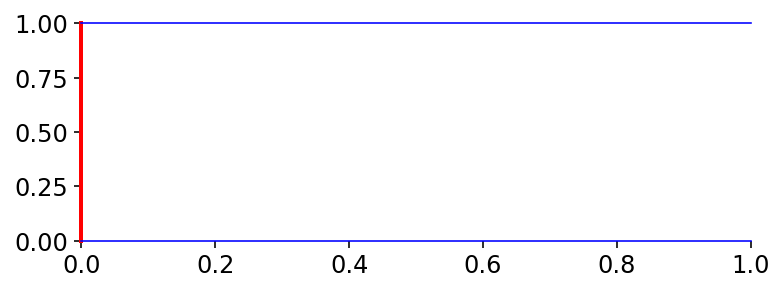

In [318]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color(None)
ax.yaxis.tick_left() # only ticks on the left side

### Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

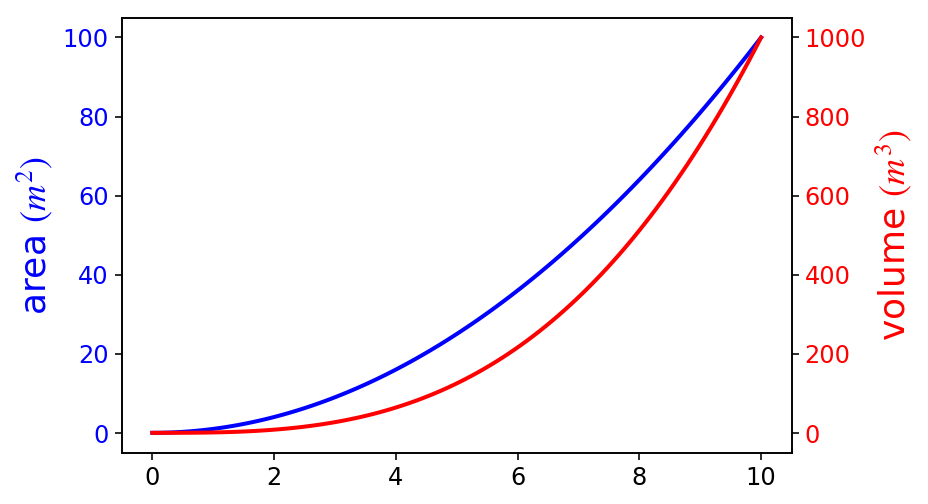

In [319]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [320]:
n = np.array([0,1,2,3,4,5])

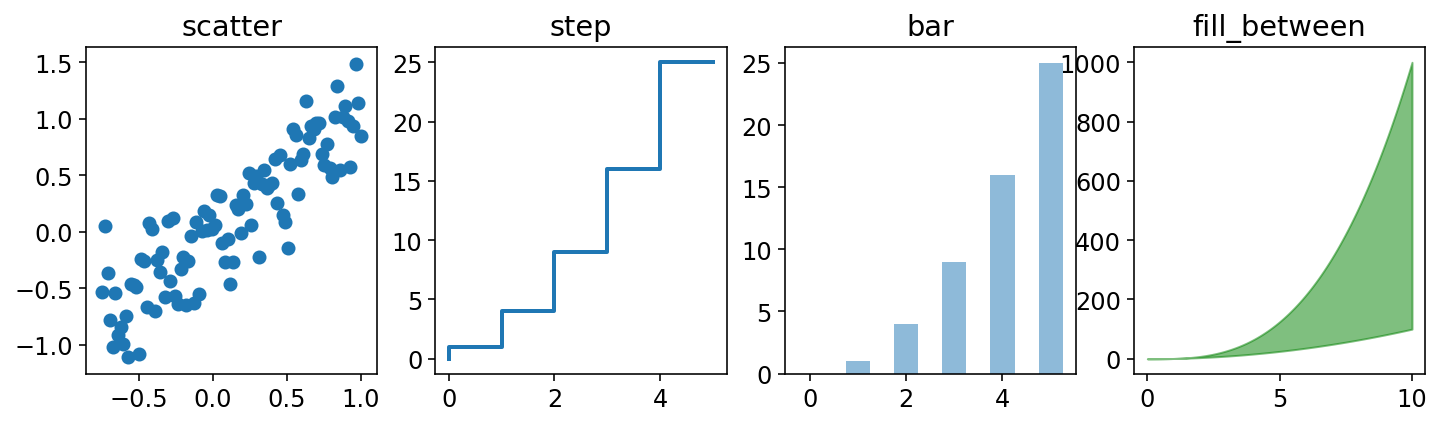

In [321]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

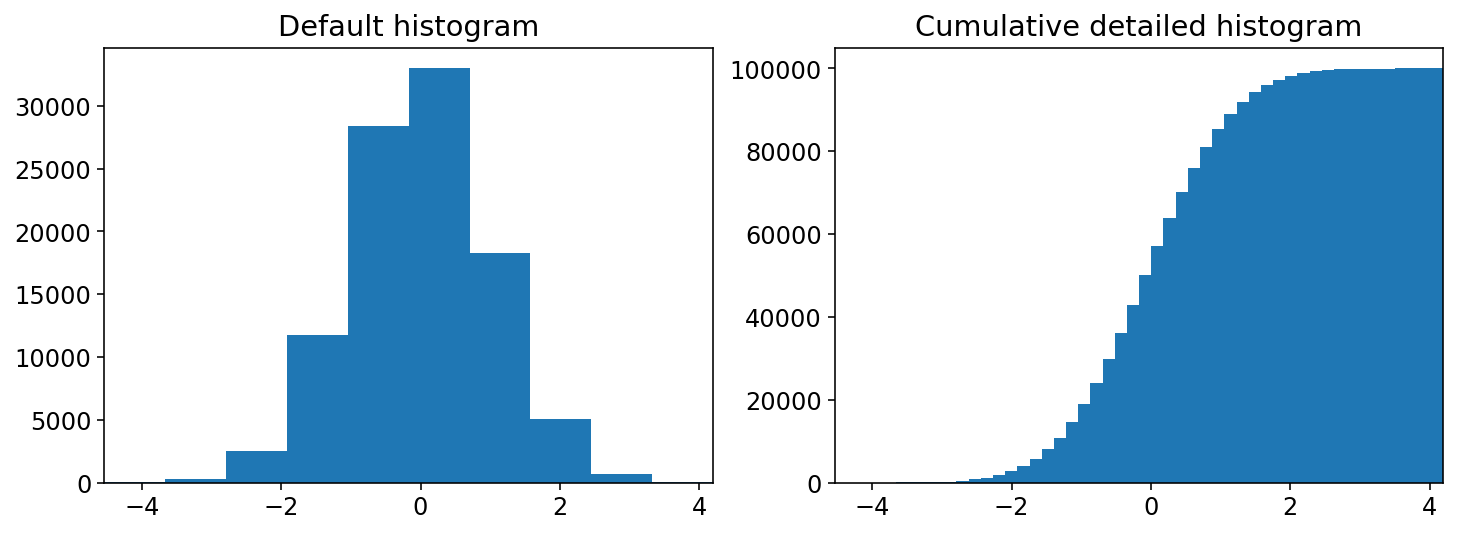

In [322]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

### Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

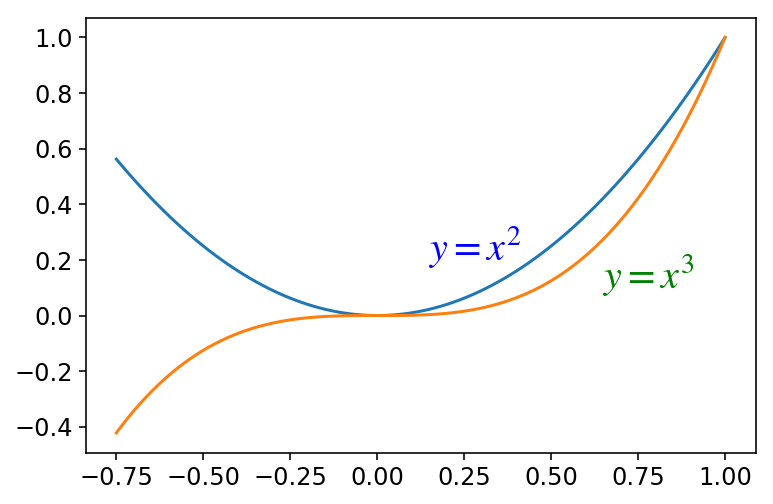

In [323]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

#### subplots

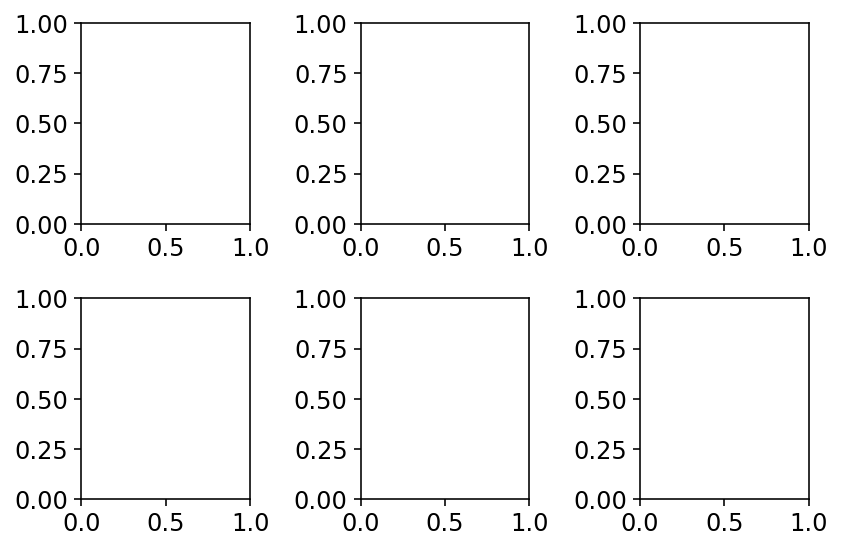

In [324]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()